In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%load_ext autoreload
%autoreload 2

from cda_prep import *
from cda_util import *
from cda_models import *

In [3]:
df, df_raw = get_data('data/data_for_student_case.csv')

In [4]:
print("Raw dataset:")
display(df_raw.head(3))

print("Processed dataset:")
display(df.head(3))

Raw dataset:


,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id,labels
txid,,,,,,,,,,,,,,,,
1,2015-11-09 14:26:51,MX,mccredit,530056,64800.0,MXN,MX,Ecommerce,True,0,2015-07-01 23:03:11,MexicoAccount,email68370,ip111778,card184798,1.0
2,2015-11-09 14:27:38,MX,mccredit,547046,44900.0,MXN,MX,Ecommerce,True,0,2015-07-02 04:50:55,MexicoAccount,email101299,ip78749,card151595,1.0
3,2015-11-23 16:34:16,MX,mccredit,528843,149900.0,MXN,MX,Ecommerce,True,0,2015-07-02 14:30:28,MexicoAccount,email278604,ip70594,card242142,1.0


Processed dataset:


,bookingdate,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,creationdate,accountcode,mail_id,ip_id,card_id,labels,amount_dollar
txid,,,,,,,,,,,,,,,,,
1,2015-11-09 14:26:51,76,2,530056,64800.0,2,98,1,1,0,2015-07-01 23:03:11,1,187702,7386,73358,1.0,4122.137405
2,2015-11-09 14:27:38,76,2,547046,44900.0,2,98,1,1,0,2015-07-02 04:50:55,1,834,194109,44739,1.0,2837.824840
3,2015-11-23 16:34:16,76,2,528843,149900.0,2,98,1,1,0,2015-07-02 14:30:28,1,119287,189655,122802,1.0,9474.163554


In [ ]:
# Class imbalance

# Time series

# High risk days?

# Monetary value

# Correlation heatmap

# t-SNE for visualization?

# issuercountrycode != shoppercountrycode != currencycode

# Correlation

In [15]:
df_bad  = df_raw[df_raw["labels"] == 1.0]
df_good = df_raw[df_raw["labels"] == 0.0]

In [28]:
df_raw.corr()

,bin,amount,cvcresponsecode,labels
bin,1.000000,0.156596,-0.072821,0.013788
amount,0.156596,1.000000,-0.223868,0.078828
cvcresponsecode,-0.072821,-0.223868,1.000000,-0.067118
labels,0.013788,0.078828,-0.067118,1.000000


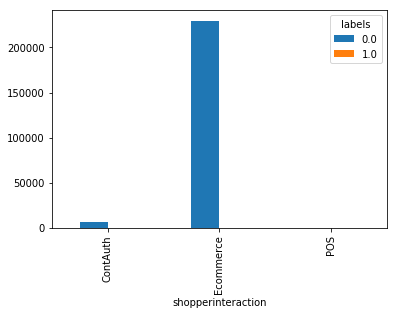

In [21]:
# df_contauth = df_raw[df_raw['shopperinteraction'] == 'ContAuth']
df_raw.groupby(['shopperinteraction', 'labels']).size().unstack().plot.bar()

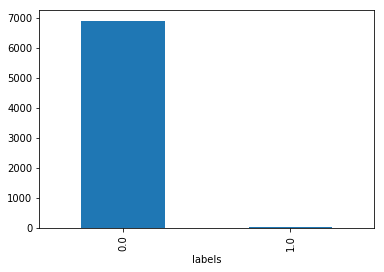

In [23]:
df_raw[df_raw['shopperinteraction'] == 'ContAuth'].groupby('labels').size().plot.bar()

In [24]:
df_raw.groupby(['shopperinteraction', 'labels']).size()

shopperinteraction  labels
ContAuth            0.0         6890
                    1.0           24
Ecommerce           0.0       229463
                    1.0          321
POS                 0.0          338
dtype: int64

### how many ContAuth(ShopperInteraction) things are actually fraud (suspect very little)

In [17]:
good_shop = df_good['shopperinteraction'].value_counts().sort_index()
bad_shop  = df_bad['shopperinteraction'].value_counts().sort_index()

display(good_shop.head())
display(bad_shop.head())


raise
indexes = fraud_issuer_country_count.index.intersection(benign_issuer_country_count.index)
benign_issuer_country_count = benign_issuer_country_count.loc[indexes]

norm_benign_issuer_country_count = benign_issuer_country_count / benign_issuer_country_count.sum()
norm_fraud_issuer_country_count = fraud_issuer_country_count / fraud_issuer_country_count.sum()

fig = plt.figure()
ax = fig.add_subplot(111)  # Create matplotlib axes

x_width = 0.4

norm_fraud_issuer_country_count.plot(kind='bar', color='red', ax=ax, width=x_width, position=1, label='Fraud', legend=True)
norm_benign_issuer_country_count.plot(kind='bar', color='blue', ax=ax, width=x_width, position=0, label='Benign', legend=True)

plt.xlabel('issuer country code')
plt.ylabel('Percentage of transactions')

plt.show()

ContAuth       6890
Ecommerce    229463
POS             338
Name: shopperinteraction, dtype: int64

ContAuth      24
Ecommerce    321
Name: shopperinteraction, dtype: int64

RuntimeError: No active exception to reraise

In [5]:
### plot the relative rates of chargebacks when looking at the different card issuers, do fraudsters have a preference?
### Plot in some way (heatmap?) how many fraudulent interactions happen respective to normal interactions, both for issuercountry and shoppercountry
### Way higher rate of chargebacks when response to CVC/CVV2 validation is unknown vs match or others
### relative rate of chargebacks compared to cardtype, MC has more than visa, particularly debit